In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive',)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/SDP_Project_files/GlobalLandTemperaturesByState.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [ ]:
df.shape

(645675, 5)

In [ ]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [ ]:
df.head(100)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
95,1863-04-01,NaN,NaN,Acre,Brazil
96,1863-05-01,NaN,NaN,Acre,Brazil
97,1863-06-01,NaN,NaN,Acre,Brazil
98,1863-07-01,NaN,NaN,Acre,Brazil


In [ ]:
df = df.dropna(how= 'any', axis=0)

In [ ]:
df.shape

(620027, 5)

In [ ]:
df.rename(columns={'dt':'Date', 'AverageTemperature':'Avg_temp', 'AverageTemperatureUncertainty':'confidence_interval_temp'}, inplace=True)
df.head()

,Date,Avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [ ]:
df.describe()

,Avg_temp,confidence_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [ ]:
df['Year'] = df.index.year
df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [ ]:
def plot_line_chart(df, x, y, title, x_label, y_label):
    fig = px.line(df, x=x, y=y, title=title)
    fig.update_layout(xaxis_title=x_label, yaxis_title=y_label)
    fig.show()

def plot_forecast(train, test, predictions):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Avg_temp'], mode='lines', name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Avg_temp'], mode='lines', name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=predictions, mode='lines', name='Predictions'))
    fig.update_layout(title='Temperature Forecast', xaxis_title='Year', yaxis_title='Temperature')
    fig.show()

In [ ]:
latest_df = df.loc['1980':'2013']
latest_df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [ ]:
latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


In [ ]:
fig = px.line(latest_df, x="Year", y="Avg_temp", color="Country", line_group="Country", hover_name="Country",
        line_shape="spline", render_mode="svg")
fig.show()

In [ ]:
resample_df = latest_df[['Avg_temp']].resample('A').mean()
resample_df.head()

,Avg_temp
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


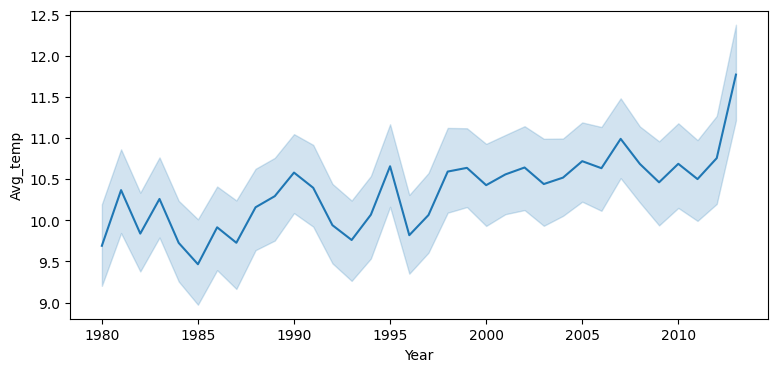

In [ ]:
plt.figure(figsize=(9, 4))
sns.lineplot(x= "Year", y = "Avg_temp", data=latest_df)
plt.show()

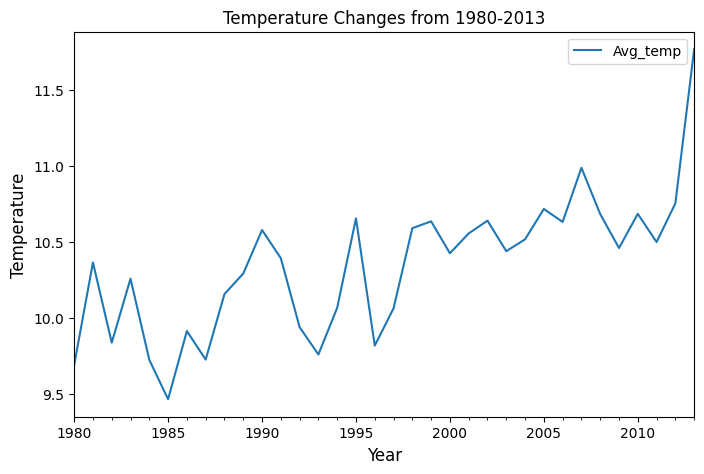

In [ ]:
resample_df.plot(title='Temperature Changes from 1980-2013',figsize=(8, 5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

In [ ]:
decomp = seasonal_decompose(resample_df, period=3)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

In [ ]:
fig = make_subplots(rows=4, cols=1, subplot_titles=('Original', 'Trend', 'Seasonal', 'Residual'))

#Plotting the original time series
fig.add_trace(go.Scatter(x=resample_df.index, y=resample_df['Avg_temp'], mode='lines', name='Original'), row=1, col=1)

#Plotting the trend component
fig.add_trace(go.Scatter(x=trend.index, y=trend, mode='lines', name='Trend'), row=2, col=1)

#Plotting the seasonal component
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal, mode='lines', name='Seasonal'), row=3, col=1)

#Plotting the residual component
fig.add_trace(go.Scatter(x=residual.index, y=residual, mode='lines', name='Residual'), row=4, col=1)

#Updating layout
fig.update_layout(title='Temperature Decomposition',
                  xaxis_title='Year',
                  yaxis_title='Temperature')
fig.show()

In [ ]:
rol_mean = resample_df.rolling(window=3, center=True).mean()
ewm = resample_df.ewm(span=3).mean()
rol_std = resample_df.rolling(window=3, center=True).std()

print('Rolling mean', rol_mean.head())
print('Exponentially weighted mean', ewm.head())
print('Rolling standard deviation', rol_std.head())

Rolling mean              Avg_temp
Date                 
1980-12-31        NaN
1981-12-31   9.964797
1982-12-31  10.154684
1983-12-31   9.940808
1984-12-31   9.816634
Exponentially weighted mean              Avg_temp
Date                 
1980-12-31   9.689856
1981-12-31  10.141004
1982-12-31   9.967835
1983-12-31  10.123398
1984-12-31   9.917748
Rolling standard deviation             Avg_temp
Date                
1980-12-31       NaN
1981-12-31  0.355745
1982-12-31  0.279468
1983-12-31  0.281734
1984-12-31  0.404902


In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Original vs. Rolling Mean vs. Exponentially Weighted Mean', 'Rolling Standard Deviation'))
fig.add_trace(go.Scatter(x=resample_df.index, y=resample_df['Avg_temp'], mode='lines', name='Original'), row=1, col=1)
fig.add_trace(go.Scatter(x=rol_mean.index, y=rol_mean['Avg_temp'], mode='lines', name='Rolling Mean'), row=1, col=1)
fig.add_trace(go.Scatter(x=ewm.index, y=ewm['Avg_temp'], mode='lines', name='Exponentially Weighted Mean'), row=1, col=1)

# Plotting Rolling Standard Deviation
fig.add_trace(go.Scatter(x=rol_std.index, y=rol_std['Avg_temp'], mode='lines', name='Rolling STD'), row=1, col=2)

# Updating layout
fig.update_layout(title='Temperature Changes from 1980-2013', xaxis_title='Year', yaxis_title='Temperature')
fig.update_xaxes(title_text='Year', row=1, col=1)
fig.update_yaxes(title_text='Temperature', row=1, col=1)
fig.update_xaxes(title_text='Year', row=1, col=2)
fig.update_yaxes(title_text='Temperature', row=1, col=2)

fig.show()